## HODRICK-PRESCOTT FILTER ## 

Statsmodels has inbuilt datasets free to use. 

In this case, we are focussing on the Hodrick-Prescott Filter to plot actuals versus trends

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pandas_profiling


#### 1 Calling data

The method below does not feel like it is a conventional way to call data but it is useful nevertheless.

In [2]:
df = sm.datasets.macrodata.load_pandas().data
df.head(2)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74


##### 2 How to get descriptions for column names using NOTE 

In [3]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

##### 3) Changing index 

In [4]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

# Define index as = pd.Index(sm.tsa.datetools.dates_from_range('startdateandmonthorquarter','enddatemonthorquarter'))

In [5]:
df.index = index
df.head(2)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74


Text(0, 0.5, 'REAL GDP')

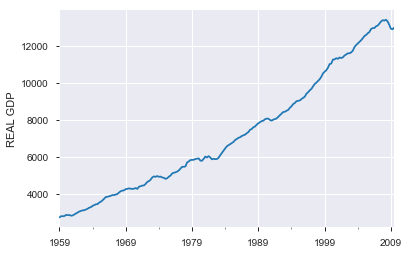

In [6]:
df['realgdp'].plot()
plt.ylabel("REAL GDP")

##### 5) Using Statsmodels to get the trend through Hodrick-Prescott filter

The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$
The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$




###### In Pythonic terms: 

The filter gives us the chance to separate the cycles (actuals) from the trends. This happens after the dates have been selected and index has been created. 

columnname_cycle, columnname_trend = sm.tsa.filters.hpfilter(df.exisitingcolumnname)


In [7]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [8]:
gdp_cycle.head(1)

1959-03-31    39.511915
Name: realgdp, dtype: float64

In [9]:
gdp_trend.head()

1959-03-31    2670.837085
1959-06-30    2698.712468
1959-09-30    2726.612545
1959-12-31    2754.612067
1960-03-31    2782.816333
Name: realgdp, dtype: float64

In [10]:
type(gdp_cycle)

pandas.core.series.Series

In [11]:
#### Create a new column before plotting the comparisons
df["trend"] = gdp_trend

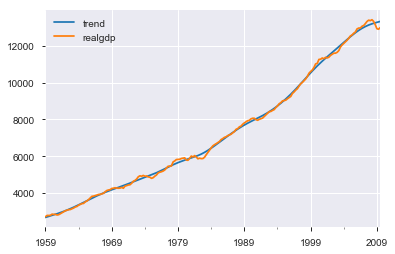

In [12]:
#### Plotting the differences

df[['trend','realgdp']].plot()

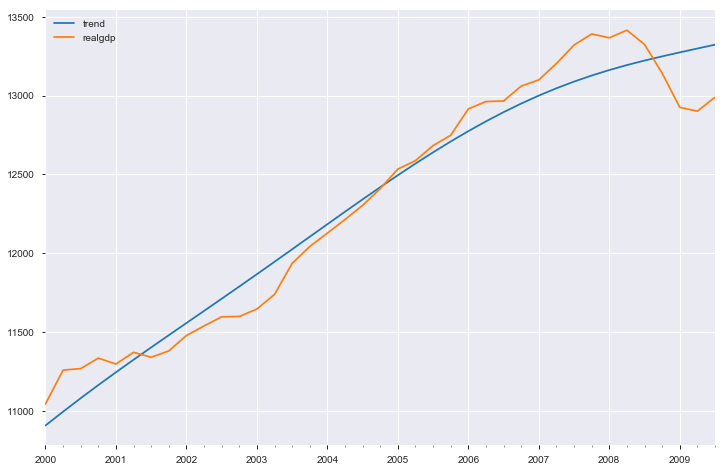

In [13]:
### TO get a more closer version, we can select dates
df[['trend','realgdp']]["2000-03-31":].plot(figsize=(12,8))